In [2]:
# Add imports
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import warnings
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
from linearmodels import PanelOLS
from sklearn.preprocessing import LabelEncoder

In [3]:
# Set up data directory
datadir = Path.cwd() / "data"

In [4]:
#Read households data
hh = pd.read_csv(datadir / "hh.csv")

/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_32418/1797500517.py:2: DtypeWarning: Columns (75,77,79,81,83,85,119,120,128,142,144,146,148,150,167,220,253,263,273,287,296,313,329,337,341,345,360,402,422,476,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,559,577,578,579,580,581,582,584,585,586,587,588,589,591,592,593,594,595,596,599,600,601,602,603,604,605,606,608,609,610,611,612,614,615,616,617,618,619,620,621,622,624,625,626,627,628,629,630,631,632,633,635,636,637,638,639,643,658,659,660,673,674,675,690,691,692,705,706,707,722,723,724,737,738,739,754,755,756,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,8

In [5]:
#Households columns of interest
hh_columns = ["hhid","wave", "hhsize","head_gender","head_age","s2_q19_floormat","s2_q20_wallmat","s2_q21a_powergrid","s2_hasinternet","s6_q1_soldasset","s5_q38_worryfood","s2_q9a_county",
"s10_knowledge_1", "s10_knowledge_2", "s10_knowledge_3", "s10_knowledge_4", "s10_knowledge_5", "s10_knowledge_6", "s10_knowledge_7", "s10_knowledge_8", 
"s10_knowledge_9", "s10_knowledge_10","s10_prevmeas_1","s10_prevmeas_2","s10_prevmeas_3","s10_prevmeas_4"
]
hh_df = hh[hh_columns]

In [6]:
hh_df.head()

,hhid,wave,hhsize,head_gender,head_age,s2_q19_floormat,s2_q20_wallmat,s2_q21a_powergrid,s2_hasinternet,s6_q1_soldasset,...,s10_knowledge_5,s10_knowledge_6,s10_knowledge_7,s10_knowledge_8,s10_knowledge_9,s10_knowledge_10,s10_prevmeas_1,s10_prevmeas_2,s10_prevmeas_3,s10_prevmeas_4
0,1,1,1,0,28.0,8.0,12.0,1,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,5,1,0,28.0,8.0,12.0,1,1.0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,3.0,3.0,3.0,3.0
2,3,1,3,1,55.0,8.0,12.0,0,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2,1,1,55.0,8.0,NaN,0,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,3,3,1,56.0,8.0,NaN,0,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Load data on household adults
hh_adult = pd.read_csv(datadir / "hh_adult.csv")

/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_32418/3975215375.py:2: DtypeWarning: Columns (105,110,111) have mixed types. Specify dtype option on import or set low_memory=False.
  hh_adult = pd.read_csv(datadir / "hh_adult.csv")


In [8]:
#Columns of interest for adults data
hh_adult_columns = ["wave", "weight", "hhid", "adult_id", "urban","age","gender","ishead","country_birth","marital","employed","unemployed","education_level",
"wherefrom_county","trust_gov", "trust_gov_resp","sat_gov_resp","healthcare_willing","healthcare_able","gov_assist","covid_symptoms1_","covid_symptoms2_","covid_symptoms3_","covid_symptoms4_","covid_symptoms5_","covid_symptoms6_",
"covid_symptoms7_","covid_symptoms8_","covid_symptoms9_","covid_symptoms10_","covid_symptoms11_","covid_symptoms12_","covid_symptoms13_","covid_symptoms14_","covid_symptoms15_",
"covid_symptoms16_","covid_symptoms17_","handwashing", "sanitizer", "no_physical", "use_mask", "use_gloves","stay_home", "social_dist","not_touch_face","wash_hand_more", "avoid_contact_more", "avoid_groups_more", "avoid_travel","avoid_crowds","trust_people"
]

In [9]:
# Filter columns
hh_adult_df = hh_adult[hh_adult_columns]

In [10]:
hh_adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96878 entries, 0 to 96877
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   wave                96878 non-null  int64  
 1   weight              96878 non-null  float64
 2   hhid                96878 non-null  int64  
 3   adult_id            96878 non-null  int64  
 4   urban               96878 non-null  int64  
 5   age                 96233 non-null  float64
 6   gender              96457 non-null  float64
 7   ishead              96878 non-null  int64  
 8   country_birth       26335 non-null  float64
 9   marital             15470 non-null  float64
 10  employed            83727 non-null  float64
 11  unemployed          83727 non-null  float64
 12  education_level     93964 non-null  float64
 13  wherefrom_county    4526 non-null   float64
 14  trust_gov           19980 non-null  float64
 15  trust_gov_resp      19980 non-null  float64
 16  sat_

In [11]:
# Add age brackets to dataset
bins= [18,30,40,50,60,110]
labels = ['Age 18-30','Age 31-40','Age 41-50','Age 51-60','Age 61 or above']
hh_adult_df['age_group'] = pd.cut(hh_adult_df['age'], bins=bins, labels=labels, right=False)

/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_32418/463742501.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hh_adult_df['age_group'] = pd.cut(hh_adult_df['age'], bins=bins, labels=labels, right=False)


In [12]:
# Add gender labels
hh_adult_df['gender_label'] = hh_adult_df['gender'].replace({0:'Male',1:'Female'})

/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_32418/1025823868.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hh_adult_df['gender_label'] = hh_adult_df['gender'].replace({0:'Male',1:'Female'})


In [13]:
# number of individuals
len(hh_adult_df)

96878

In [14]:
 # As the goal is to measure responses from Kenayn citizens, only survey responses with country of birth coded as Kenya are included
hh_adults_all_wvs = hh_adult_df

In [15]:
hh_adults_all_wvs.groupby("wave")["adult_id"].agg("count")

wave
1    10374
2    11492
3    12054
4    11483
5    13653
6    13634
7    13160
8    11028
Name: adult_id, dtype: int64

In [16]:
#number of individuals after filtering only kenyan citizens
len(hh_adults_all_wvs)

96878

In [17]:
hh_adults_all_wvs[["gender", "age", "urban", "employed", "ishead","age_group"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96878 entries, 0 to 96877
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   gender     96457 non-null  float64 
 1   age        96233 non-null  float64 
 2   urban      96878 non-null  int64   
 3   employed   83727 non-null  float64 
 4   ishead     96878 non-null  int64   
 5   age_group  96221 non-null  category
dtypes: category(1), float64(3), int64(2)
memory usage: 3.8 MB


In [18]:
hh_adults_all_wvs[["gender", "age", "urban", "employed", "ishead","age_group"]].describe()

,gender,age,urban,employed,ishead
count,96457.000000,96233.000000,96878.000000,83727.000000,96878.000000
mean,0.521362,37.036786,0.520531,0.700001,0.415285
std,0.499546,15.222959,0.499581,0.458260,0.492774
min,0.000000,18.000000,0.000000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000
50%,1.000000,34.000000,1.000000,1.000000,0.000000
75%,1.000000,46.000000,1.000000,1.000000,1.000000
max,1.000000,110.000000,1.000000,1.000000,1.000000


In [19]:
# Age group proportions
hh_adults_all_wvs.groupby(["age_group"])["age"].agg('count').map(lambda count : 100 * count/len(hh_adults_all_wvs)).sort_values(ascending=False)

age_group
Age 18-30          37.516258
Age 31-40          24.492661
Age 41-50          16.729288
Age 61 or above    10.303681
Age 51-60          10.279940
Name: age, dtype: float64

## Variable Construction

### Trust in government

In [20]:
# Check for nulls on other trust indicators 
# The Government is trustworthy in the way it manages the Covid crisis (trust_gov_resp)
# Are you satisfied with the government's response to the coronavirus crisis? (sat_gov_resp)
# The Govt. is willing to provide healthcare to address the Covid crisis (healthcare_willing)
# The Govt. is able to provide healthcare to address the Covid crisis (healthcare_able)
# The Govt. is able to provide enough assistance in response to the Covid crisis (gov_assist)
trust_indidcators = ["trust_gov","trust_gov_resp","healthcare_willing","healthcare_able","gov_assist","sat_gov_resp"]
hh_adults_all_wvs[trust_indidcators].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96878 entries, 0 to 96877
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   trust_gov           19980 non-null  float64
 1   trust_gov_resp      19980 non-null  float64
 2   healthcare_willing  19980 non-null  float64
 3   healthcare_able     19980 non-null  float64
 4   gov_assist          19980 non-null  float64
 5   sat_gov_resp        19903 non-null  float64
dtypes: float64(6)
memory usage: 4.4 MB


In [21]:
#Based on the observarions above it seems like the data it is inline with the survey study- to that end, i drop the null columns
hh_adults_all_wvs.dropna(subset=trust_indidcators, inplace=True, how='all')

/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_32418/676028434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hh_adults_all_wvs.dropna(subset=trust_indidcators, inplace=True, how='all')


In [22]:
hh_adults_all_wvs[trust_indidcators].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19980 entries, 1 to 96874
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   trust_gov           19980 non-null  float64
 1   trust_gov_resp      19980 non-null  float64
 2   healthcare_willing  19980 non-null  float64
 3   healthcare_able     19980 non-null  float64
 4   gov_assist          19980 non-null  float64
 5   sat_gov_resp        19903 non-null  float64
dtypes: float64(6)
memory usage: 1.1 MB


In [23]:
# Get scores on trust_gov - Trust in country’s government to take care of its citizens?
age_trust_proportions = hh_adults_all_wvs.groupby(["age_group"])["trust_gov"].agg('mean').sort_values(ascending=False)
age_trust_proportions

age_group
Age 61 or above    4.016321
Age 51-60          3.994985
Age 18-30          3.904848
Age 41-50          3.904817
Age 31-40          3.876734
Name: trust_gov, dtype: float64

In [24]:
hh_adults_all_wvs[trust_indidcators].head()

,trust_gov,trust_gov_resp,healthcare_willing,healthcare_able,gov_assist,sat_gov_resp
1,5.0,3.0,3.0,3.0,3.0,1.0
3,5.0,3.0,3.0,3.0,3.0,0.0
4,5.0,3.0,3.0,3.0,3.0,1.0
6,3.0,2.0,3.0,3.0,2.0,0.0
18,1.0,1.0,1.0,1.0,3.0,0.0


In [25]:
# Cronbach test on trust indicators
pg.cronbach_alpha(data=hh_adults_all_wvs[trust_indidcators])

(0.8272222140874239, array([0.823, 0.831]))

In [26]:
#Correlation in trust 
hh_adults_all_wvs[trust_indidcators].corr()

,trust_gov,trust_gov_resp,healthcare_willing,healthcare_able,gov_assist,sat_gov_resp
trust_gov,1.000000,0.525253,0.511512,0.451176,0.350110,0.469075
trust_gov_resp,0.525253,1.000000,0.729762,0.565201,0.444787,0.539112
healthcare_willing,0.511512,0.729762,1.000000,0.614232,0.451697,0.467707
healthcare_able,0.451176,0.565201,0.614232,1.000000,0.507180,0.425098
gov_assist,0.350110,0.444787,0.451697,0.507180,1.000000,0.353611
sat_gov_resp,0.469075,0.539112,0.467707,0.425098,0.353611,1.000000


In [27]:
# Util to encode responses on the likert 3pt scale
def encode_3pt_likert_scale(row):
    if row == 3:
        return 1
    else:
        return 0

In [28]:
# Util to encode responses on the 5pt likert scale
def encode_5pt_likert_scale(row):
    if row == 5 or row == 4:
        return 1
    else:
        return 0

### Summary stats on trust in government indicators

In [44]:
hh_adults_all_wvs["trust_gov_enc"] = hh_adults_all_wvs["trust_gov"].map(encode_5pt_likert_scale)
hh_adults_all_wvs["trust_gov_resp_enc"] = hh_adults_all_wvs["trust_gov_resp"].map(encode_3pt_likert_scale)
hh_adults_all_wvs["healthcare_willing_enc"] = hh_adults_all_wvs["healthcare_willing"].map(encode_3pt_likert_scale)
hh_adults_all_wvs["healthcare_able_enc"] = hh_adults_all_wvs["healthcare_able"].map(encode_3pt_likert_scale)
hh_adults_all_wvs["gov_assist_enc"] = hh_adults_all_wvs["gov_assist"].map(encode_3pt_likert_scale)
hh_adults_all_wvs["sat_gov_resp_enc"] = hh_adults_all_wvs["sat_gov_resp"].map(encode_3pt_likert_scale)

/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_32418/1018258968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hh_adults_all_wvs["trust_gov_enc"] = hh_adults_all_wvs["trust_gov"].map(encode_5pt_likert_scale)
/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_32418/1018258968.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hh_adults_all_wvs["trust_gov_resp_enc"] = hh_adults_all_wvs["trust_gov_resp"].map(encode_3pt_likert_scale)
/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipy

In [47]:
trust_indidcators_enc = ["trust_gov_enc","trust_gov_resp_enc","healthcare_willing_enc","healthcare_able_enc","gov_assist_enc","sat_gov_resp"]

In [48]:
hh_adults_all_wvs[trust_indidcators_enc].describe()

,trust_gov_enc,trust_gov_resp_enc,healthcare_willing_enc,healthcare_able_enc,gov_assist_enc,sat_gov_resp
count,19980.000000,19980.000000,19980.000000,19980.000000,19980.000000,19903.000000
mean,0.704454,0.644044,0.673924,0.692993,0.460260,0.650053
std,0.456299,0.478814,0.468787,0.461264,0.498431,0.476965
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
hh_adults_all_wvs.groupby("wave")["trust_gov_resp_enc"].describe()

,count,mean,std,min,25%,50%,75%,max
wave,,,,,,,,
1,2054.0,0.702045,0.457471,0.0,0.0,1.0,1.0,1.0
2,2554.0,0.734534,0.441667,0.0,0.0,1.0,1.0,1.0
3,2727.0,0.581958,0.493328,0.0,0.0,1.0,1.0,1.0
4,2663.0,0.589561,0.492006,0.0,0.0,1.0,1.0,1.0
5,4334.0,0.584910,0.492794,0.0,0.0,1.0,1.0,1.0
6,2874.0,0.675017,0.468450,0.0,0.0,1.0,1.0,1.0
7,2774.0,0.691420,0.461990,0.0,0.0,1.0,1.0,1.0


In [33]:
hh_adults_all_wvs.groupby("wave")["healthcare_willing_enc"].describe()

,count,mean,std,min,25%,50%,75%,max
wave,,,,,,,,
1,2054.0,0.739046,0.439262,0.0,0.0,1.0,1.0,1.0
2,2554.0,0.743931,0.436546,0.0,0.0,1.0,1.0,1.0
3,2727.0,0.650532,0.476890,0.0,0.0,1.0,1.0,1.0
4,2663.0,0.592940,0.491378,0.0,0.0,1.0,1.0,1.0
5,4334.0,0.625519,0.484044,0.0,0.0,1.0,1.0,1.0
6,2874.0,0.656228,0.475049,0.0,0.0,1.0,1.0,1.0
7,2774.0,0.755948,0.429601,0.0,1.0,1.0,1.0,1.0


In [34]:
hh_adults_all_wvs.groupby("wave")["healthcare_able_enc"].describe()

,count,mean,std,min,25%,50%,75%,max
wave,,,,,,,,
1,2054.0,0.745862,0.435482,0.0,0.0,1.0,1.0,1.0
2,2554.0,0.761159,0.426459,0.0,1.0,1.0,1.0,1.0
3,2727.0,0.684635,0.464746,0.0,0.0,1.0,1.0,1.0
4,2663.0,0.623733,0.484539,0.0,0.0,1.0,1.0,1.0
5,4334.0,0.666359,0.471568,0.0,0.0,1.0,1.0,1.0
6,2874.0,0.682324,0.465654,0.0,0.0,1.0,1.0,1.0
7,2774.0,0.718457,0.449833,0.0,0.0,1.0,1.0,1.0


In [35]:
hh_adults_all_wvs.groupby("wave")["gov_assist_enc"].describe()

,count,mean,std,min,25%,50%,75%,max
wave,,,,,,,,
1,2054.0,0.468354,0.499119,0.0,0.0,0.0,1.0,1.0
2,2554.0,0.576351,0.494233,0.0,0.0,1.0,1.0,1.0
3,2727.0,0.563990,0.495979,0.0,0.0,1.0,1.0,1.0
4,2663.0,0.451746,0.497760,0.0,0.0,0.0,1.0,1.0
5,4334.0,0.449469,0.497497,0.0,0.0,0.0,1.0,1.0
6,2874.0,0.361865,0.480624,0.0,0.0,0.0,1.0,1.0
7,2774.0,0.372386,0.483528,0.0,0.0,0.0,1.0,1.0


In [36]:
def calculate_trust_index(row):
    trust_index = 0
    #Encoding if respondents respond with strongly trust or somehow trust -  How much do you trust your country’s government to take care of its citizens?
    if row["trust_gov"] == 5 or row["trust_gov"] == 4:
        trust_index+=1
    
    # The Government is trustworthy in the way it manages the Coronavirus crisis
    if row["trust_gov_resp"] == 3:
        trust_index+=1

    #The Government is able to provide health care to address the Coronavirus crisis   
    if row["healthcare_willing"] == 3:
        trust_index+=1

    #The Government is able to provide health care to address the Coronavirus crisis
    if row["healthcare_able"] == 3:
        trust_index+=1
    
    if row["sat_gov_resp"] == 3:
        trust_index+=1

    #The Government is able to provide enough assistance (cash and in-kind) in response to the crisis
    if row["gov_assist"] == 3:
        trust_index+=1

    return trust_index


In [37]:
hh_adults_all_wvs["trust_index"] = hh_adults_all_wvs.apply(lambda row: calculate_trust_index(row), axis=1)

/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_32418/1868241098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hh_adults_all_wvs["trust_index"] = hh_adults_all_wvs.apply(lambda row: calculate_trust_index(row), axis=1)


In [38]:
hh_adults_all_wvs.groupby("gender_label")["trust_index"].describe()

,count,mean,std,min,25%,50%,75%,max
gender_label,,,,,,,,
Female,10679.0,3.202360,1.837001,0.0,1.0,4.0,5.0,5.0
Male,9283.0,3.145319,1.845315,0.0,1.0,4.0,5.0,5.0


In [39]:
hh_adults_all_wvs.groupby("age_group")["trust_index"].describe()

,count,mean,std,min,25%,50%,75%,max
age_group,,,,,,,,
Age 18-30,4435.0,3.178354,1.837435,0.0,1.0,4.0,5.0,5.0
Age 31-40,6344.0,3.114281,1.855413,0.0,1.0,4.0,5.0,5.0
Age 41-50,4339.0,3.137128,1.850038,0.0,1.0,4.0,5.0,5.0
Age 51-60,2592.0,3.281636,1.806161,0.0,2.0,4.0,5.0,5.0
Age 61 or above,2267.0,3.295986,1.821757,0.0,2.0,4.0,5.0,5.0


### Compliance Index

In [40]:
compliance_indicators = ["wash_hand_more", "avoid_contact_more", "avoid_groups_more"]

In [41]:
hh_adults_all_wvs[compliance_indicators].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19980 entries, 1 to 96874
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   wash_hand_more      19871 non-null  float64
 1   avoid_contact_more  19876 non-null  float64
 2   avoid_groups_more   19875 non-null  float64
dtypes: float64(3)
memory usage: 624.4 KB


In [64]:
hh_adults_all_wvs.dropna(subset=compliance_indicators, how='any', inplace=True)

/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_32418/1386182605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hh_adults_all_wvs.dropna(subset=compliance_indicators, how='any', inplace=True)


In [65]:
hh_adults_all_wvs[compliance_indicators].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19865 entries, 1 to 96874
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   wash_hand_more      19865 non-null  float64
 1   avoid_contact_more  19865 non-null  float64
 2   avoid_groups_more   19865 non-null  float64
dtypes: float64(3)
memory usage: 620.8 KB


In [66]:
# Convert compliance dtype to int
hh_adults_all_wvs[compliance_indicators] = hh_adults_all_wvs[compliance_indicators].astype(int)

/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_32418/656383946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hh_adults_all_wvs[compliance_indicators] = hh_adults_all_wvs[compliance_indicators].astype(int)


In [67]:
hh_adults_all_wvs[compliance_indicators].describe()

,wash_hand_more,avoid_contact_more,avoid_groups_more
count,19865.000000,19865.000000,19865.000000
mean,0.914372,0.935565,0.807954
std,0.279821,0.245532,0.393919
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


In [68]:
hh_adults_all_wvs.groupby("gender_label")[compliance_indicators].agg(["mean","std","count"])

wash_hand_more                  avoid_contact_more            \
                       mean       std  count               mean       std   
gender_label                                                                
Female              0.91669  0.276363  10623           0.937871  0.241402   
Male                0.91186  0.283513   9224           0.932892  0.250222   

                    avoid_groups_more                   
              count              mean       std  count  
gender_label                                            
Female        10623          0.804104  0.396907  10623  
Male           9224          0.812012  0.390724   9224

In [69]:
# Calculate overall compliance index for a better overall picture
def calculate_compliance_index(row):
    compliance_index = 0
    for indicator in compliance_indicators:
        if row[indicator] == 1:
            compliance_index+=1
    return compliance_index

In [70]:
hh_adults_all_wvs["compliance_index"] = hh_adults_all_wvs.apply(lambda row: calculate_compliance_index(row), axis=1)

/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_32418/3041435886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hh_adults_all_wvs["compliance_index"] = hh_adults_all_wvs.apply(lambda row: calculate_compliance_index(row), axis=1)


In [71]:
# Females have higher compliance index as compared to men
hh_adults_all_wvs.groupby("gender_label")["compliance_index"].describe()

,count,mean,std,min,25%,50%,75%,max
gender_label,,,,,,,,
Female,10623.0,2.658665,0.640996,0.0,2.0,3.0,3.0,3.0
Male,9224.0,2.656765,0.649049,0.0,2.0,3.0,3.0,3.0


In [72]:
hh_adults_all_wvs["education_above_med"] = (hh_adults_all_wvs['education_level'].gt(hh_adults_all_wvs['education_level'].median())).astype(int)

/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_32418/1421884890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hh_adults_all_wvs["education_above_med"] = (hh_adults_all_wvs['education_level'].gt(hh_adults_all_wvs['education_level'].median())).astype(int)


In [73]:
hh_adults_all_wvs["education_above_med"].mean()

0.17045054115278127

In [74]:
# On average more males are above the median education
hh_adults_all_wvs.groupby("gender_label")["education_above_med"].mean()

gender_label
Female    0.148640
Male      0.195902
Name: education_above_med, dtype: float64

In [75]:
hh_adults_all_wvs['married'] = hh_adults_all_wvs['marital'].replace({1:1,2:0,3:1,4:0,5:1,6:0,7:0,8:0,9:0,'z':0})

/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_32418/1435548894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hh_adults_all_wvs['married'] = hh_adults_all_wvs['marital'].replace({1:1,2:0,3:1,4:0,5:1,6:0,7:0,8:0,9:0,'z':0})


In [76]:
hh_adults_all_wvs['married'].mean()

0.42414014786242366

In [77]:
#Calculate binary variable poor score
poverty_dict = {}
def calculate_poor(row):
    wave = row["wave"]
    hhid = row["hhid"]
    poor = 0
    key = f"{wave}{hhid}"
    if row["s2_q19_floormat"] == 1 or row["s2_q19_floormat"] == 2:
        poor = 1
    poverty_dict.update({key:poor})

In [78]:
hh_df.apply(lambda row: calculate_poor(row), axis=1)

0        None
1        None
2        None
3        None
4        None
         ... 
40230    None
40231    None
40232    None
40233    None
40234    None
Length: 40235, dtype: object

In [79]:
len(poverty_dict)

40235

In [80]:
poverty_binary_list = []
def map_poverty_binary(row, poverty_dict):
    wave = row["wave"]
    hhid = row["hhid"]
    poverty_binary_list.append(poverty_dict[f"{wave}{hhid}"])

In [81]:
hh_adults_all_wvs.apply(lambda row: map_poverty_binary(row, poverty_dict), axis=1)

1        None
3        None
4        None
6        None
18       None
         ... 
96862    None
96866    None
96868    None
96870    None
96874    None
Length: 19865, dtype: object

In [82]:
hh_adults_all_wvs['poor'] = poverty_binary_list

/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_32418/1286262061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hh_adults_all_wvs['poor'] = poverty_binary_list


In [83]:
hh_adults_all_wvs["poor"].mean()

0.3795117040020136

In [84]:
hh_adults_all_wvs.groupby("wave")["poor"].agg(["mean","std"])

,mean,std
wave,,
1,0.383001,0.486243
2,0.381904,0.485948
3,0.341651,0.474350
4,0.389391,0.487704
5,0.393995,0.488690
6,0.392758,0.488449
7,0.366258,0.481868


In [85]:
county_dict = {}
def get_county(row):
    wave = row["wave"]
    hhid = row["hhid"]
    key = f"{wave}{hhid}"
    county_dict.update({key:row["s2_q9a_county"]})

In [86]:
hh_df.apply(lambda row: get_county(row), axis=1)

0        None
1        None
2        None
3        None
4        None
         ... 
40230    None
40231    None
40232    None
40233    None
40234    None
Length: 40235, dtype: object

In [203]:
hh_df.apply(lambda row: get_hhsize(row), axis=1)

0        None
1        None
2        None
3        None
4        None
         ... 
40230    None
40231    None
40232    None
40233    None
40234    None
Length: 40235, dtype: object

In [87]:
counties_list = []
def map_country(row, county_dict):
    wave = row["wave"]
    hhid = row["hhid"]
    counties_list.append(county_dict[f"{wave}{hhid}"])

In [88]:
hh_adults_all_wvs.apply(lambda row: map_country(row, county_dict), axis=1)

1        None
3        None
4        None
6        None
18       None
         ... 
96862    None
96866    None
96868    None
96870    None
96874    None
Length: 19865, dtype: object

In [ ]:
hhsizelist = []
def map_country(row, county_dict):
    wave = row["wave"]
    hhid = row["hhid"]
    counties_list.append(county_dict[f"{wave}{hhid}"])

In [89]:
hh_adults_all_wvs['county'] = counties_list

/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_32418/2495955281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hh_adults_all_wvs['county'] = counties_list


In [90]:
model_vars = ["trust_index", "compliance_index","age_group","gender","education_above_med", "poor", "urban", "ishead","county","trust_people"]

In [91]:
hh_adults_all_wvs[model_vars].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19865 entries, 1 to 96874
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   trust_index          19865 non-null  int64   
 1   compliance_index     19865 non-null  int64   
 2   age_group            19862 non-null  category
 3   gender               19847 non-null  float64 
 4   education_above_med  19865 non-null  int64   
 5   poor                 19865 non-null  int64   
 6   urban                19865 non-null  int64   
 7   ishead               19865 non-null  int64   
 8   county               19865 non-null  int64   
 9   trust_people         19776 non-null  float64 
dtypes: category(1), float64(2), int64(7)
memory usage: 1.5 MB


In [92]:
hh_adults_all_wvs.dropna(subset=model_vars, how='any', inplace=True)

/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_32418/1587053070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hh_adults_all_wvs.dropna(subset=model_vars, how='any', inplace=True)


In [93]:
hh_adults_all_wvs[model_vars].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19756 entries, 1 to 96874
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   trust_index          19756 non-null  int64   
 1   compliance_index     19756 non-null  int64   
 2   age_group            19756 non-null  category
 3   gender               19756 non-null  float64 
 4   education_above_med  19756 non-null  int64   
 5   poor                 19756 non-null  int64   
 6   urban                19756 non-null  int64   
 7   ishead               19756 non-null  int64   
 8   county               19756 non-null  int64   
 9   trust_people         19756 non-null  float64 
dtypes: category(1), float64(2), int64(7)
memory usage: 1.5 MB


In [94]:
hh_adults_all_wvs[['trust_index', 'compliance_index']] = StandardScaler().fit_transform(hh_adults_all_wvs[['trust_index','compliance_index']])

/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_32418/3953526451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hh_adults_all_wvs[['trust_index', 'compliance_index']] = StandardScaler().fit_transform(hh_adults_all_wvs[['trust_index','compliance_index']])


In [95]:
compliance_by_wave = hh_adults_all_wvs.groupby("wave")["compliance_index"].mean()
trust_by_wave = pd.DataFrame(hh_adults_all_wvs.groupby("wave")["trust_index"].mean())
trust_by_wave["compliance_index"] = pd.DataFrame(compliance_by_wave)

In [96]:
trust_by_wave["StartDate"] = ["07-2020","08-2020","12-2020","03-2021","06-2021","11-2021","03-2022"]
trust_by_wave["EndDate"] = ["07-2020","08-2020","12-2020","03-2021","06-2021","11-2021","03-2022"]

In [97]:
# convert the 'Date' column to datetime format
trust_by_wave['StartDate']= pd.to_datetime(trust_by_wave['StartDate'],format='%m-%Y').dt.strftime('%b-%Y')
trust_by_wave['EndDate']= pd.to_datetime(trust_by_wave['EndDate'],format='%m-%Y').dt.strftime('%b-%Y')

In [98]:
trust_by_wave.head()

,trust_index,compliance_index,StartDate,EndDate
wave,,,,
1,0.131151,0.469748,Jul-2020,Jul-2020
2,0.198685,0.167154,Aug-2020,Aug-2020
3,-0.020782,-0.342773,Dec-2020,Dec-2020
4,-0.159169,-0.188029,Mar-2021,Mar-2021
5,-0.096598,0.089277,Jun-2021,Jun-2021


In [99]:
trust_by_wave.set_index(['EndDate'], inplace=True)

<AxesSubplot:xlabel='EndDate'>

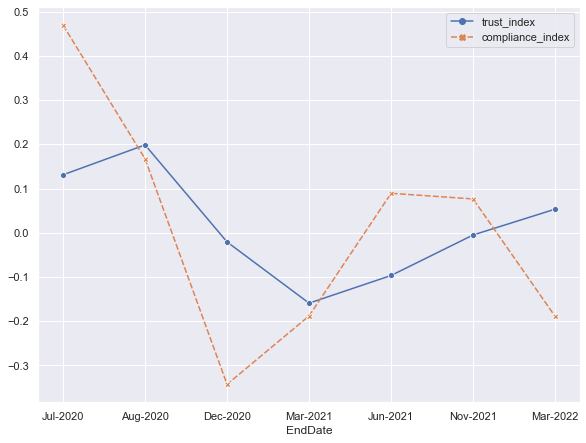

In [100]:
import seaborn as sns

sns.set(rc={'figure.figsize':(9.7,7.27)})
sns.lineplot(data=trust_by_wave,markers=True, marker="o")

## RQ1: Do people who trust the government more likely to comply with COVID 19 guidelines?

In [101]:
hh_adults_all_wvs[['trust_index', 'compliance_index']] = StandardScaler().fit_transform(hh_adults_all_wvs[['trust_index','compliance_index']])

/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_32418/3953526451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hh_adults_all_wvs[['trust_index', 'compliance_index']] = StandardScaler().fit_transform(hh_adults_all_wvs[['trust_index','compliance_index']])


In [102]:
from statsmodels.formula.api import probit

In [103]:
d = [{'trust_index': 1, 'gender':1, 'education_above_med': 0, 'age_group':'Age 31-40', 'urban':1, 'poor':0, 'ishead':0, 'trust_people':0},
    {'trust_index': 5, 'gender':1, 'education_above_med': 0, 'age_group':'Age 31-40', 'urban':1, 'poor':0, 'ishead':0, 'trust_people':0}]
nd = pd.DataFrame(data=d)
nd['trust_index'] = StandardScaler().fit_transform(nd[['trust_index']])
nd.head()

,trust_index,gender,education_above_med,age_group,urban,poor,ishead,trust_people
0,-1.0,1,0,Age 31-40,1,0,0,0
1,1.0,1,0,Age 31-40,1,0,0,0


In [121]:
import statsmodels.genmod.bayes_mixed_glm as mglm

In [129]:
formula = "avoid_groups_more ~ trust_index + gender + trust_index + gender  + education_above_med + C(age_group) + urban + poor + ishead + trust_people "
mod1 = smf.glm(formula=formula, data=hh_adults_all_wvs,
               family=sm.families.Binomial()).fit()
pred = mod1.get_prediction(exog=nd)
prob = pred.predicted_mean
ci = pred.conf_int()
lower = [prob[0] - ci[0,0], prob[1] - ci[1,0]]
upper = [ci[0,1] - prob[0], ci[1,1] - prob[1]]

In [137]:
formula = "wash_hand_more ~ trust_index + gender + trust_index + gender  + education_above_med + C(age_group) + urban + poor + ishead + trust_people "
mod2 = smf.glm(formula=formula, data=hh_adults_all_wvs,
               family=sm.families.Binomial()).fit()
pred = mod2.get_prediction(exog=nd)
wash_prob = pred.predicted_mean
ci = pred.conf_int()
w_lower = [wash_prob[0] - ci[0,0], wash_prob[1] - ci[1,0]]
w_upper = [ci[0,1] - wash_prob[0], ci[1,1] - wash_prob[1]]

In [143]:
formula = "avoid_contact_more ~ trust_index + gender + trust_index + gender  + education_above_med + C(age_group) + urban + poor + ishead + trust_people "
mod3 = smf.glm(formula=formula, data=hh_adults_all_wvs,
               family=sm.families.Binomial()).fit()
pred = mod3.get_prediction(exog=nd)
ct_prob = pred.predicted_mean
ci = pred.conf_int()
ct_lower = [ct_prob[0] - ci[0,0], ct_prob[1] - ci[1,0]]
ct_upper = [ci[0,1] - ct_prob[0], ci[1,1] - ct_prob[1]]

In [146]:
pred.predicted_mean

array([0.96579504, 0.97542006])

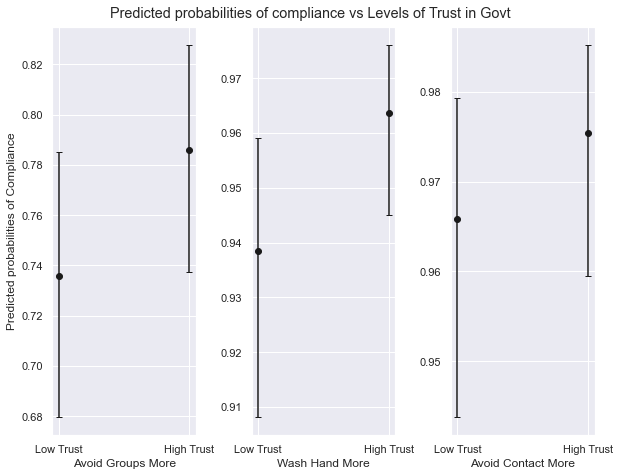

In [107]:
fig, axs = plt.subplots(1, 3, constrained_layout=True)
fig.set_size_inches(8.5, 6.5, forward=True)
fig.suptitle("Predicted probabilities of compliance vs Levels of Trust in Govt")
axs[0].set_ylabel('Predicted probabilities of Compliance')

axs[0].errorbar(x = ["Low Trust","High Trust"], y = prob, 
             yerr=[lower, upper], fmt='ok', capsize=3)
axs[0].set_xlabel("Avoid Groups More")

axs[1].errorbar(x = ["Low Trust","High Trust"], y = wash_prob, 
             yerr=[w_lower, w_upper], fmt='ok', capsize=3)
axs[1].set_xlabel("Wash Hand More")



axs[2].errorbar(x = ["Low Trust","High Trust"], y = ct_prob, 
             yerr=[ct_lower, ct_upper], fmt='ok',capsize=3)
axs[2].set_xlabel("Avoid Contact More")
plt.show()

In [108]:
import statsmodels.regression.mixed_linear_model as mlm

In [117]:
hh_adults_all_wvs["individual_id"] = hh_adults_all_wvs.groupby(["hhid", "adult_id"]).ngroup()

/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_32418/1729263077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hh_adults_all_wvs["individual_id"] = hh_adults_all_wvs.groupby(["hhid", "adult_id"]).ngroup()


In [118]:
formula = "compliance_index ~ trust_index + gender + education_above_med + C(age_group) + urban + poor + ishead"

In [120]:
# Adapted from https://github.com/statsmodels/statsmodels/issues/6802
mod = smf.ols(formula="compliance_index ~ trust_index + gender + education_above_med + C(age_group) + urban + poor + ishead + trust_people", data=hh_adults_all_wvs)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       compliance_index   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     15.40
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           7.24e-28
Time:                        06:22:33   Log-Likelihood:                -27956.
No. Observations:               19756   AIC:                         5.593e+04
Df Residuals:                   19745   BIC:                         5.602e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [119]:
# Adapted from https://github.com/statsmodels/statsmodels/issues/6802
mod = smf.mixedlm(formula="compliance_index ~ trust_index + gender + education_above_med + C(age_group) + urban + poor + ishead", data=hh_adults_all_wvs, groups="county", re_formula="1", vc_formula={"group2": "1 + C(hhid)","group3":"1 + C(individual_id)"}, use_sparse=True)
res = mod.fit(method=["lbfgs"])
print(res.summary())

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


                  Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     compliance_index
No. Observations:     19756       Method:                 REML            
No. Groups:           47          Scale:                  0.9007          
Min. group size:      103         Log-Likelihood:         -28182.4965     
Max. group size:      1179        Converged:              Yes             
Mean group size:      420.3                                               
--------------------------------------------------------------------------
                                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------
Intercept                       -0.064    0.144 -0.443 0.658 -0.346  0.219
C(age_group)[T.Age 31-40]        0.010    0.022  0.458 0.647 -0.033  0.053
C(age_group)[T.Age 41-50]        0.014    0.024  0.564 0.572 -0.034  0.062
C(age_group)[T.Age 51-60]        0.009    0.

## RQ2: Do people who trust the government more likely to support govt COVID 19 guidelines?

In [149]:
support_df = hh_adults_all_wvs

In [150]:
support_indicators = ["s10_prevmeas_1","s10_prevmeas_2","s10_prevmeas_3","s10_prevmeas_4"]

In [151]:
all_heads_df = support_df[support_df.ishead == 1]

In [152]:
len(all_heads_df)

14654

In [153]:
prev_measure1_dict = {}
def get_prev_measure1_dict(row):
    wave = row["wave"]
    hhid = row["hhid"]
    key = f"{wave}{hhid}"
    prev_measure1_dict.update({key:row["s10_prevmeas_1"]})

prev_measure2_dict = {}
def get_prev_measure2_dict(row):
    wave = row["wave"]
    hhid = row["hhid"]
    key = f"{wave}{hhid}"
    prev_measure2_dict.update({key:row["s10_prevmeas_2"]})

prev_measure3_dict = {}
def get_prev_measure3_dict(row):
    wave = row["wave"]
    hhid = row["hhid"]
    key = f"{wave}{hhid}"
    prev_measure3_dict.update({key:row["s10_prevmeas_3"]})

prev_measure4_dict = {}
def get_prev_measure4_dict(row):
    wave = row["wave"]
    hhid = row["hhid"]
    key = f"{wave}{hhid}"
    prev_measure4_dict.update({key:row["s10_prevmeas_4"]})

In [154]:
hh_df.apply(lambda row: get_prev_measure1_dict(row), axis=1)
hh_df.apply(lambda row: get_prev_measure2_dict(row), axis=1)
hh_df.apply(lambda row: get_prev_measure3_dict(row), axis=1)
hh_df.apply(lambda row: get_prev_measure4_dict(row), axis=1)

0        None
1        None
2        None
3        None
4        None
         ... 
40230    None
40231    None
40232    None
40233    None
40234    None
Length: 40235, dtype: object

In [155]:
prev_measure1_list = []
def map_prev_measure1_list(row, prev_measure1_dict):
    wave = row["wave"]
    hhid = row["hhid"]
    prev_measure1_list.append(prev_measure1_dict[f"{wave}{hhid}"])

prev_measure2_list = []
def map_prev_measure2_list(row, prev_measure2_dict):
    wave = row["wave"]
    hhid = row["hhid"]
    prev_measure2_list.append(prev_measure2_dict[f"{wave}{hhid}"])

prev_measure3_list = []
def map_prev_measure3_list(row, prev_measure3_dict):
    wave = row["wave"]
    hhid = row["hhid"]
    prev_measure3_list.append(prev_measure3_dict[f"{wave}{hhid}"])

prev_measure4_list = []
def map_prev_measure4_list(row, prev_measure4_dict):
    wave = row["wave"]
    hhid = row["hhid"]
    prev_measure4_list.append(prev_measure4_dict[f"{wave}{hhid}"])

In [156]:
support_df.apply(lambda row: map_prev_measure1_list(row, prev_measure1_dict), axis=1)
support_df.apply(lambda row: map_prev_measure2_list(row, prev_measure2_dict), axis=1)
support_df.apply(lambda row: map_prev_measure3_list(row, prev_measure3_dict), axis=1)
support_df.apply(lambda row: map_prev_measure4_list(row, prev_measure4_dict), axis=1)

1        None
3        None
4        None
6        None
18       None
         ... 
96862    None
96866    None
96868    None
96870    None
96874    None
Length: 19756, dtype: object

In [157]:
support_df['s10_prevmeas_1'] = prev_measure1_list
support_df['s10_prevmeas_2'] = prev_measure2_list
support_df['s10_prevmeas_3'] = prev_measure3_list
support_df['s10_prevmeas_4'] = prev_measure4_list

/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_32418/3852678725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  support_df['s10_prevmeas_1'] = prev_measure1_list
/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_32418/3852678725.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  support_df['s10_prevmeas_2'] = prev_measure2_list
/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_32418/3852678725.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [158]:
support_df[["s10_prevmeas_1","s10_prevmeas_2","s10_prevmeas_3","s10_prevmeas_4"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19756 entries, 1 to 96874
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   s10_prevmeas_1  12588 non-null  float64
 1   s10_prevmeas_2  12588 non-null  float64
 2   s10_prevmeas_3  12588 non-null  float64
 3   s10_prevmeas_4  9942 non-null   float64
dtypes: float64(4)
memory usage: 1.3 MB


In [159]:
hh_adults_all_wvs[["s10_prevmeas_1","s10_prevmeas_2","s10_prevmeas_3","s10_prevmeas_4"]].head()

,s10_prevmeas_1,s10_prevmeas_2,s10_prevmeas_3,s10_prevmeas_4
1,3.0,3.0,3.0,3.0
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
6,3.0,3.0,3.0,3.0
18,NaN,NaN,NaN,NaN


In [160]:
support_df.dropna(subset=["s10_prevmeas_1","s10_prevmeas_2","s10_prevmeas_3","s10_prevmeas_4"], inplace=True, how="all")

/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_32418/931615803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  support_df.dropna(subset=["s10_prevmeas_1","s10_prevmeas_2","s10_prevmeas_3","s10_prevmeas_4"], inplace=True, how="all")


In [161]:
support_df.wave.unique()

array([5, 6, 7, 4])

In [162]:
support_df["s10_prevmeas_1_enc"] = support_df["s10_prevmeas_1"].map(encode_3pt_likert_scale)
support_df["s10_prevmeas_2_enc"] = support_df["s10_prevmeas_2"].map(encode_3pt_likert_scale)
support_df["s10_prevmeas_3_enc"] = support_df["s10_prevmeas_3"].map(encode_3pt_likert_scale)
support_df["s10_prevmeas_4_enc"] = support_df["s10_prevmeas_4"].map(encode_3pt_likert_scale)

/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_32418/4192168349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  support_df["s10_prevmeas_1_enc"] = support_df["s10_prevmeas_1"].map(encode_3pt_likert_scale)
/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_32418/4192168349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  support_df["s10_prevmeas_2_enc"] = support_df["s10_prevmeas_2"].map(encode_3pt_likert_scale)
/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_32418/41921

In [163]:
support_df[["s10_prevmeas_1_enc","s10_prevmeas_2_enc","s10_prevmeas_3_enc","s10_prevmeas_4_enc"]].describe()

,s10_prevmeas_1_enc,s10_prevmeas_2_enc,s10_prevmeas_3_enc,s10_prevmeas_4_enc
count,12588.000000,12588.000000,12588.000000,12588.000000
mean,0.941293,0.925087,0.926676,0.738878
std,0.235084,0.263261,0.260678,0.439264
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [164]:
def calculate_support_index(row):
    support_index = 0
    for s in support_indicators:
        if row[s] == 3:
            support_index+=1
    return support_index

In [165]:
support_df["support_index"] = support_df.apply(lambda row: calculate_support_index(row), axis=1)

/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_32418/1487470068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  support_df["support_index"] = support_df.apply(lambda row: calculate_support_index(row), axis=1)


In [166]:
# Standardize no_of_believed_myths
support_df[['support_index']] = StandardScaler().fit_transform(support_df[['support_index']])

/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_32418/3285142738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  support_df[['support_index']] = StandardScaler().fit_transform(support_df[['support_index']])


In [167]:
mod = smf.mixedlm(formula="support_index ~ trust_index + gender  + education_above_med + C(age_group) + urban + poor", data=support_df,  groups="county", re_formula="1", vc_formula={"group2": "1 + C(hhid)","group3":"1 + C(individual_id)"})
res = mod.fit()
print(res.summary())

KeyboardInterrupt: 

In [188]:
formula = "s10_prevmeas_1_enc ~ trust_index + gender + trust_index + gender  + education_above_med + C(age_group) + urban + poor + trust_people "
mod1 = smf.glm(formula=formula, data=support_df,
               family=sm.families.Binomial()).fit()
pred1 = mod1.get_prediction(exog=nd)
prob = pred1.predicted_mean
ci = pred1.conf_int()
lower = [prob[0] - ci[0,0], prob[1] - ci[1,0]]
upper = [ci[0,1] - prob[0], ci[1,1] - prob[1]]

In [191]:
print(prob)
print(pred1.t_test())
print(lower, upper)

[0.65904307 0.8663332 ]
(array([13.81482945, 35.41434151]), array([2.07444960e-043, 1.02718211e-274]))
[0.09860808053093795, 0.055585396996423175] [0.08652968985650533, 0.04112292676951623]


In [192]:
formula = "s10_prevmeas_2_enc ~ trust_index + gender + trust_index + gender  + education_above_med + C(age_group) + urban + poor + ishead + trust_people"
mod2 = smf.glm(formula=formula, data=support_df,
               family=sm.families.Binomial()).fit()
pred2 = mod2.get_prediction(exog=nd)
prob2 = pred2.predicted_mean
ci = pred2.conf_int()
lower_2 = [prob2[0] - ci[0,0], prob2[1] - ci[1,0]]
upper_2 = [ci[0,1] - prob2[0], ci[1,1] - prob2[1]]

In [193]:
print(prob2)
print(pred2.t_test())
print(lower_2, upper_2)

[0.59716079 0.80941414]
(array([12.43162273, 26.69362538]), array([1.76024414e-035, 5.58132978e-157]))
[0.09659128820920371, 0.0665418021370544] [0.08960019775438954, 0.052521933364782836]


In [181]:
formula = "s10_prevmeas_3_enc ~ trust_index + gender + trust_index + gender  + education_above_med + C(age_group) + urban + poor + ishead + trust_people"
mod3 = smf.glm(formula=formula, data=support_df,
               family=sm.families.Binomial()).fit()
pred3 = mod3.get_prediction(exog=nd)
prob3 = pred3.predicted_mean
ci = pred3.conf_int()
lower_3 = [prob3[0] - ci[0,0], prob3[1] - ci[1,0]]
upper_3 = [ci[0,1] - prob3[0], ci[1,1] - prob3[1]]

In [194]:
print(prob3)
print(pred3.t_test())
print(lower_3, upper_3)

[0.60181526 0.82334349]
(array([12.38747325, 28.31542549]), array([3.05518601e-035, 2.23194735e-176]))
[0.09789594950882374, 0.06431906912825514] [0.0903776308413945, 0.050015926153961]


In [195]:
formula = "s10_prevmeas_4_enc ~ trust_index + gender + trust_index + gender  + education_above_med + C(age_group) + urban + poor + ishead + trust_people"
mod4 = smf.glm(formula=formula, data=support_df,
               family=sm.families.Binomial()).fit()
pred4 = mod4.get_prediction(exog=nd)
prob4 = pred4.predicted_mean
ci = pred4.conf_int()
lower_4 = [prob4[0] - ci[0,0], prob4[1] - ci[1,0]]
upper_4 = [ci[0,1] - prob4[0], ci[1,1] - prob4[1]]

In [199]:
print(prob4)
print(pred4.t_test())
print(lower_4, upper_4)

[0.38142561 0.49642654]
(array([12.082501  , 15.26842164]), array([1.30683330e-33, 1.24141578e-52]))
[0.05967577300003851, 0.06332464977566271] [0.06348361391477847, 0.0634395003498428]


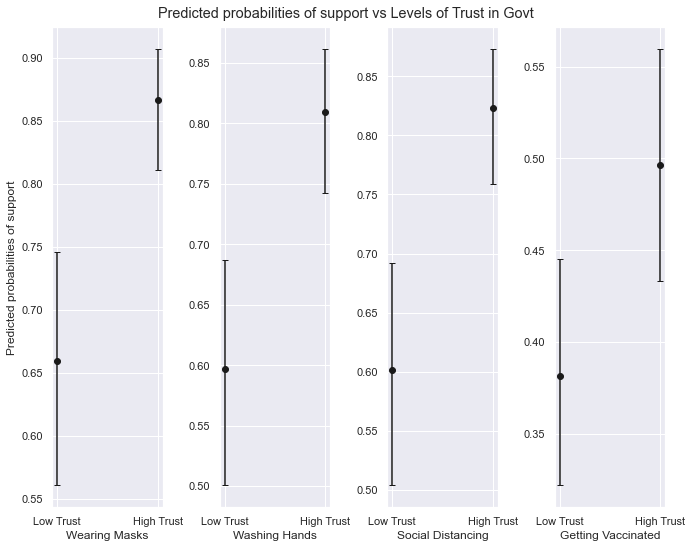

In [197]:
fig, axs = plt.subplots(1, 4, constrained_layout=True)
fig.set_size_inches(9.5,7.5, forward=True)
fig.suptitle("Predicted probabilities of support vs Levels of Trust in Govt")
axs[0].set_ylabel('Predicted probabilities of support')

axs[0].errorbar(x = ["Low Trust","High Trust"], y = prob, 
             yerr=[lower, upper], fmt='ok', capsize=3)
axs[0].set_xlabel("Wearing Masks")

axs[1].errorbar(x = ["Low Trust","High Trust"], y = prob2, 
             yerr=[lower_2, upper_2], fmt='ok', capsize=3)
axs[1].set_xlabel("Washing Hands")


axs[2].errorbar(x = ["Low Trust","High Trust"], y = prob3, 
             yerr=[lower_3, upper_3], fmt='ok',capsize=3)
axs[2].set_xlabel("Social Distancing")

axs[3].errorbar(x = ["Low Trust","High Trust"], y = prob4, 
             yerr=[lower_4, upper_4], fmt='ok',capsize=3)
axs[3].set_xlabel("Getting Vaccinated")
plt.show()

### RQ3: Do people who trust the government less more likely to be susceptible to COVID myths and conspiracy theories?

In [50]:
myths = ["s10_knowledge_1","s10_knowledge_3","s10_knowledge_2","s10_knowledge_4","s10_knowledge_5", "s10_knowledge_6", "s10_knowledge_7", "s10_knowledge_9","s10_knowledge_10"]

In [51]:
myth_df = hh_adults_all_wvs

In [52]:
t = hh_df[(hh_df["wave"]==5) & (hh_df["hhid"]==1)][myths].values

In [53]:
all_myths = []
def get_myths_believed(row,df):
    #list to keep track of myths
    wave = row["wave"]
    hhid = row["hhid"]
    i_myths = hh_df[(hh_df["wave"]==wave) & (hh_df["hhid"]==hhid)][myths].values[0]
    all_myths.append(i_myths)

In [54]:
myth_df.apply(lambda row: get_myths_believed(row, hh_df), axis=1)

1        None
3        None
4        None
6        None
18       None
         ... 
96862    None
96866    None
96868    None
96870    None
96874    None
Length: 19980, dtype: object

In [55]:
myth_df[myths] = all_myths

/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_32418/3499539377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myth_df[myths] = all_myths
/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_32418/3499539377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myth_df[myths] = all_myths
/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_32418/3499539377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [56]:
myth_df[myths].describe()

,s10_knowledge_1,s10_knowledge_3,s10_knowledge_2,s10_knowledge_4,s10_knowledge_5,s10_knowledge_6,s10_knowledge_7,s10_knowledge_9,s10_knowledge_10
count,12310.000000,12620.000000,12604.000000,12612.000000,12498.000000,12589.000000,12558.00000,12367.000000,12598.000000
mean,0.427782,0.921236,0.054586,0.039328,0.167307,0.052586,0.05614,0.109242,0.137165
std,0.494777,0.269381,0.227179,0.194381,0.373264,0.223214,0.23020,0.311956,0.344035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [59]:
myth_df.groupby("wave")[myths].agg(["mean","std","count"])

s10_knowledge_1                 s10_knowledge_3                  \
                mean       std count            mean       std count   
wave                                                                   
1                NaN       NaN     0             NaN       NaN     0   
2                NaN       NaN     0             NaN       NaN     0   
3                NaN       NaN     0             NaN       NaN     0   
4           0.355537  0.478775  2402        0.870223  0.336121  2643   
5           0.350701  0.477245  4280        0.900277  0.299665  4332   
6           0.507327  0.500034  2866        0.988166  0.108159  2873   
7           0.527516  0.499333  2762        0.933261  0.249614  2772   

     s10_knowledge_2                 s10_knowledge_4  ... s10_knowledge_6  \
                mean       std count            mean  ...           count   
wave                                                  ...                   
1                NaN       NaN     0             NaN  ...               0   
2                NaN       NaN     0             NaN  ...               0   
3                NaN       NaN     0             NaN  ...               0   
4           0.061836  0.240903  2636        0.049734  ...            2616   
5           0.062182  0.241514  4326        0.048004  ...            4331   
6           0.038314  0.191987  2871        0.005225  ...            2870   
7           0.052689  0.223451  2771        0.051190  ...            2772   

     s10_knowledge_7                 s10_knowledge_9                  \
                mean       std count            mean       std count   
wave                                                                   
1                NaN       NaN     0             NaN       NaN     0   
2                NaN       NaN     0             NaN       NaN     0   
3                NaN       NaN     0             NaN       NaN     0   
4           0.077190  0.266945  2591        0.112278  0.315772  2476   
5           0.053885  0.225817  4324        0.101647  0.302219  4250   
6           0.027865  0.164614  2871        0.104878  0.306450  2870   
7           0.069264  0.253948  2772        0.122699  0.328151  2771   

     s10_knowledge_10                  
                 mean       std count  
wave                                   
1                 NaN       NaN     0  
2                 NaN       NaN     0  
3                 NaN       NaN     0  
4            0.139535  0.346570  2623  
5            0.180328  0.384505  4331  
6            0.133403  0.340069  2871  
7            0.071403  0.257543  2773  

[7 rows x 27 columns]

In [1158]:
def calculate_no_of_believed_myths(row):
    no_of_believed_myths = 0
    for s in myths:
        if row[s] == 1:
            no_of_believed_myths+=1
    return no_of_believed_myths

In [1159]:
myth_df["no_of_believed_myths"] = myth_df.apply(lambda row: calculate_no_of_believed_myths(row), axis=1)

In [1160]:
myth_df[['no_of_believed_myths','trust_index']] = StandardScaler().fit_transform(myth_df[['no_of_believed_myths', 'trust_index']])

In [1182]:
myth_df['individual_id'].head()

1     0
6     1
23    2
40    4
42    4
Name: individual_id, dtype: int64

In [1198]:
test = myth_df.sample(1000)

In [1266]:
mod = smf.mixedlm(formula="no_of_believed_myths ~ trust_index + gender  + education_above_med + C(age_group) + urban + poor + ishead", data=myth_df, groups="county", re_formula="1", vc_formula={"group2": "0 + C(wave)","group3":"0 + C(individual_id)"}, use_sparse=True)
res = mod.fit(method=["lbfgs"])
print(res.summary())

                  Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   no_of_believed_myths
No. Observations:     12588     Method:               REML                
No. Groups:           47        Scale:                0.9293              
Min. group size:      61        Log-Likelihood:       -17635.4332         
Max. group size:      768       Converged:            No                  
Mean group size:      267.8                                               
--------------------------------------------------------------------------
                                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------
Intercept                        0.013    0.059  0.224 0.823 -0.102  0.129
C(age_group)[T.Age 31-40]       -0.011    0.025 -0.450 0.653 -0.059  0.037
C(age_group)[T.Age 41-50]       -0.009    0.027 -0.337 0.736 -0.062  0.044
C(age_group)[T.Age 51-60]       -0.014    0.

In [ ]:
res.summary().t